In [1]:
import numpy as np
import librosa
from core_functions.mfcc.mfcc import fft, mel_filterbank, signal_power_to_db, cosine_transform
from core_functions.mfcc.prepocessing import pre_emphasis, frame_blocking, windowing
import librosa.display as libdisplay
import matplotlib.pyplot as plt

In [2]:
def vis_windowed(signal: np.ndarray, sampling_rate: int = None, title: str = ""):
  plt.figure(figsize=(8, 3))
  plt.title(title)
  librosa.display.waveshow(signal, sr=sampling_rate)
  plt.show()

def vis_fft(signal: np.ndarray, title: str = ""):
  plt.figure(figsize=(8, 3))
  plt.title(title)
  plt.plot(signal)
  plt.show()
  
def visualize_spectrogram(y_spec: np.array, parameters: dict, title: str = ""):
  plt.figure(figsize=(8, 3))
  plt.title(title)
  libdisplay.specshow(y_spec, y_axis='linear', sr=parameters['fs'], cmap='autumn', x_axis='time', hop_length=parameters['window_step'])
  plt.show(block=False)
  
def visualize_mfcc(y_spec: np.array, parameters: dict, title: str = ""):
  plt.figure(figsize=(8, 3))
  plt.title(title)
  libdisplay.specshow(y_spec, y_axis='frames', sr=parameters['fs'], x_axis='time', hop_length=parameters['window_step'])
  plt.colorbar()
  plt.ylabel('MFCC')
  plt.show(block=False)

def vis_triangle_melbank(nfilt, fbank):
  plt.figure(figsize=(8, 3))
  for i in range(nfilt):
    plt.plot(fbank[i])
  plt.xlabel('FFT Bins')
  plt.ylabel('Amplitude')
  plt.grid(True)
  plt.show()

In [3]:
y, sr = librosa.load('../resources/dataset/train/Ark.mp3')
emphasis_sigal = pre_emphasis(signal=y, coefficients=0.97)
framed_signal_05 = frame_blocking(signal=emphasis_sigal, frame_size=0.5, frame_hop=0.25, sampling_rate=sr)
framed_signal_10 = frame_blocking(signal=emphasis_sigal, frame_size=1, frame_hop=0.5, sampling_rate=sr)
framed_signal_15 = frame_blocking(signal=emphasis_sigal, frame_size=1.5, frame_hop=0.75, sampling_rate=sr)
windowed_signal_05 = windowing(signal=framed_signal_05)
windowed_signal_10 = windowing(signal=framed_signal_10)
windowed_signal_15 = windowing(signal=framed_signal_15)
fft_signal_05 = fft(signal=windowed_signal_05, n_fft=512)
fft_signal_10 = fft(signal=windowed_signal_10, n_fft=512)
fft_signal_15 = fft(signal=windowed_signal_15, n_fft=512)
melbank_signal_05, hz_point_05 = mel_filterbank(signal=fft_signal_05, n_mels=40, f_max=sr/2, f_min=0, sample_rate=sr)
melbank_signal_10, hz_point_10 = mel_filterbank(signal=fft_signal_10, n_mels=40, f_max=sr/2, f_min=0, sample_rate=sr)
melbank_signal_15, hz_point_15 = mel_filterbank(signal=fft_signal_15, n_mels=40, f_max=sr/2, f_min=0, sample_rate=sr)
log_spec_signal_05 = signal_power_to_db(signal=melbank_signal_05)
log_spec_signal_10 = signal_power_to_db(signal=melbank_signal_10)
log_spec_signal_15 = signal_power_to_db(signal=melbank_signal_15)
features_05 = cosine_transform(signal=log_spec_signal_05, coefficients=13)
features_10 = cosine_transform(signal=log_spec_signal_10, coefficients=13)
features_15 = cosine_transform(signal=log_spec_signal_15, coefficients=13)

In [4]:
data_title = "Ark.mp3"
n_fft = 512
params_05 = {
  'fs': sr,
  'n_fft': n_fft,
  'window_length': sr * 0.5,
  'window_step': int((sr / 2) * 0.5),
}
params_10 = {
  'fs': sr,
  'n_fft': n_fft,
  'window_length': sr * 1,
  'window_step': int((sr / 2) * 1),
}
params_15 = {
  'fs': sr,
  'n_fft': n_fft,
  'window_length': sr * 1.5,
  'window_step': int((sr / 2) * 1.5),
}


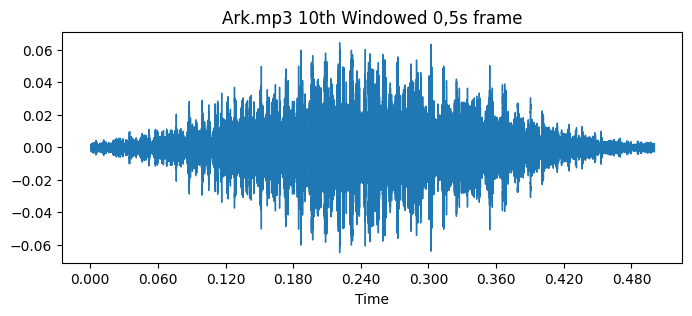

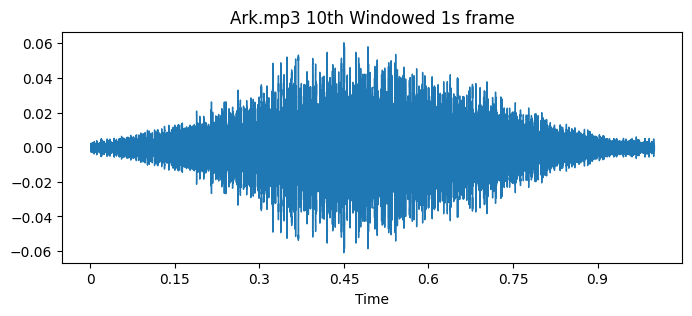

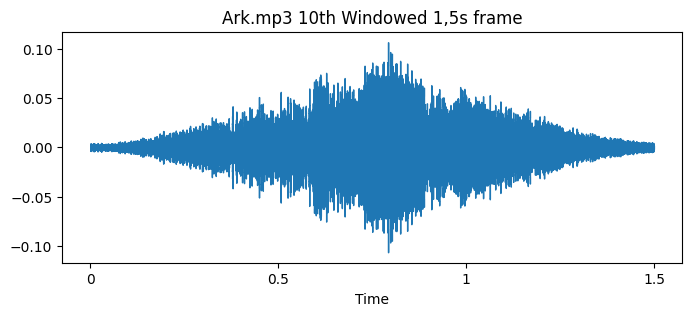

In [5]:
vis_windowed(signal=windowed_signal_05[10], sampling_rate=sr, title=f"{data_title} 10th Windowed 0,5s frame")
vis_windowed(signal=windowed_signal_10[10], sampling_rate=sr, title=f"{data_title} 10th Windowed 1s frame")
vis_windowed(signal=windowed_signal_15[10], sampling_rate=sr, title=f"{data_title} 10th Windowed 1,5s frame")

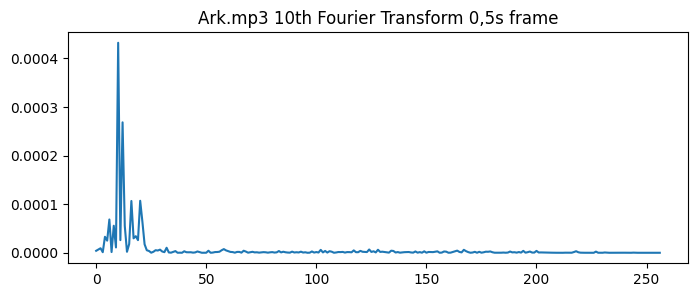

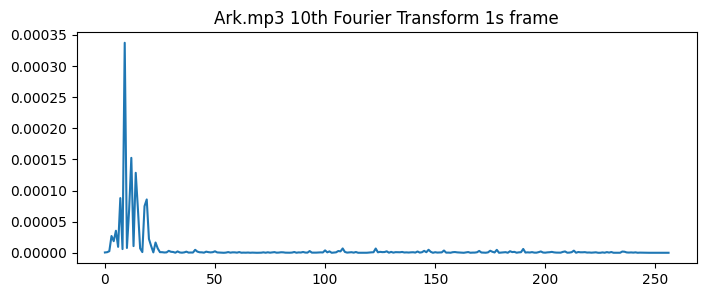

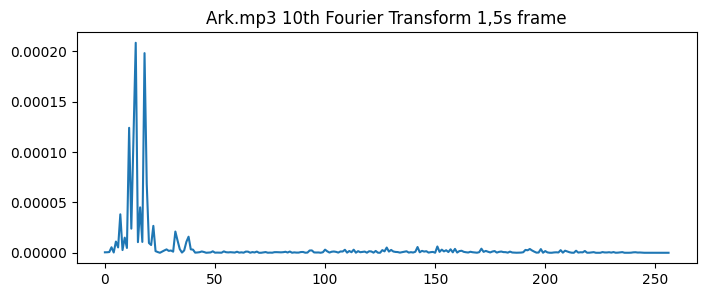

In [6]:
vis_fft(signal=fft_signal_05[10], title=f"{data_title} 10th Fourier Transform 0,5s frame")
vis_fft(signal=fft_signal_10[10], title=f"{data_title} 10th Fourier Transform 1s frame")
vis_fft(signal=fft_signal_15[10], title=f"{data_title} 10th Fourier Transform 1,5s frame")

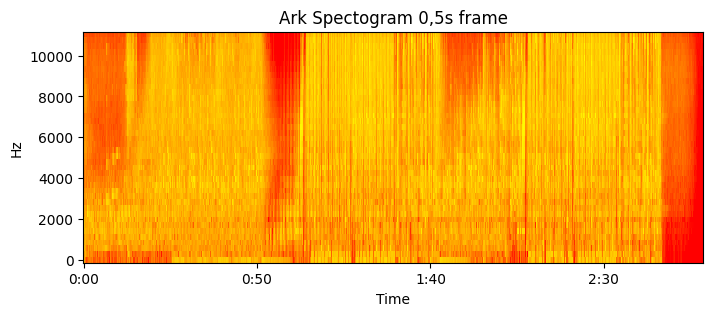

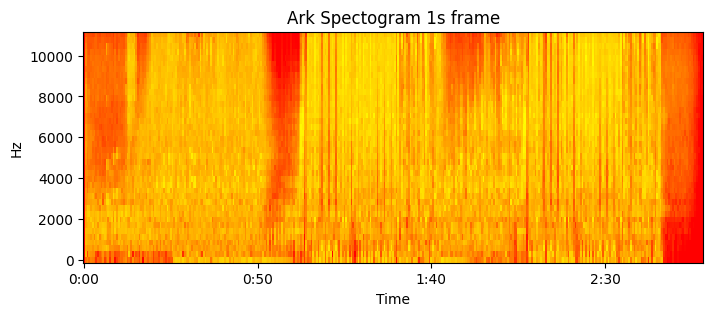

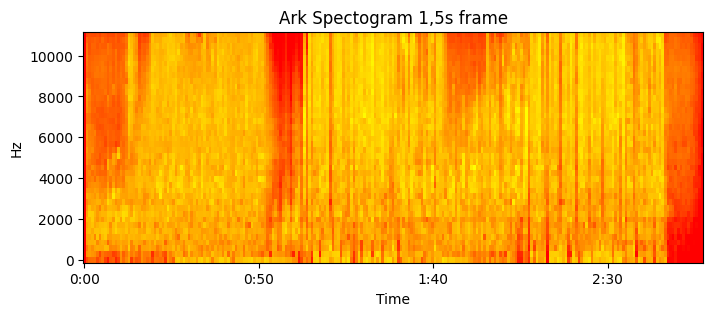

In [7]:
visualize_spectrogram(y_spec=log_spec_signal_05.T, parameters=params_05, title="Ark Spectogram 0,5s frame")
visualize_spectrogram(y_spec=log_spec_signal_10.T, parameters=params_10, title="Ark Spectogram 1s frame")
visualize_spectrogram(y_spec=log_spec_signal_15.T, parameters=params_15, title="Ark Spectogram 1,5s frame")

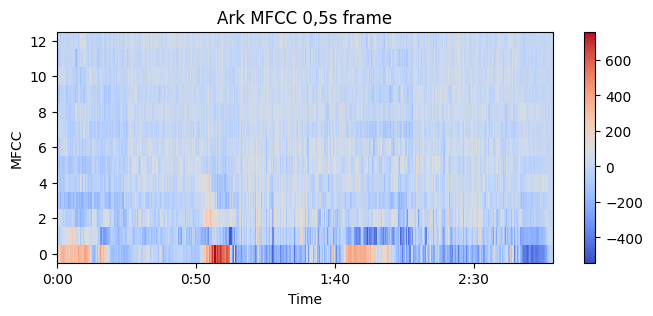

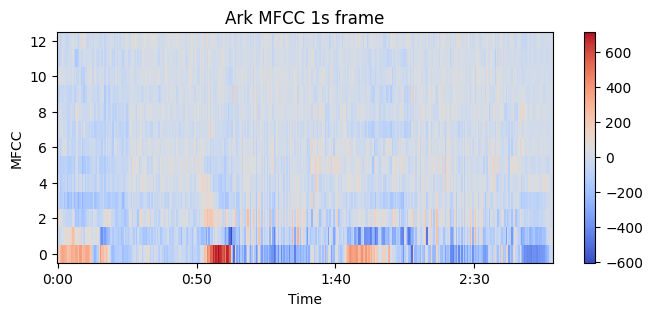

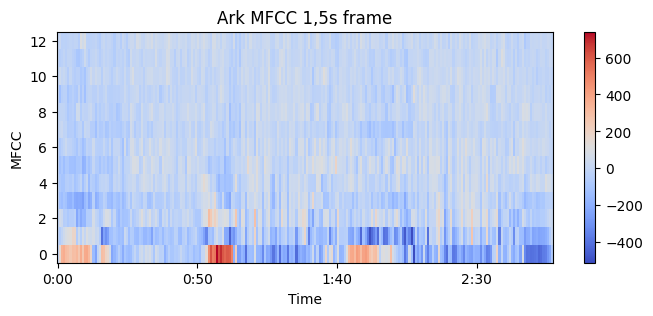

In [8]:
visualize_mfcc(y_spec=features_05.T, parameters=params_05, title="Ark MFCC 0,5s frame")
visualize_mfcc(y_spec=features_10.T, parameters=params_10, title="Ark MFCC 1s frame")
visualize_mfcc(y_spec=features_15.T, parameters=params_15, title="Ark MFCC 1,5s frame")


(237, 13)